In [1]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from local_evaluation import evaluate
from forecast.scenarios_lean import Scenario_Generator
from forecast.file import PerfectFile, RealForecast, ScenarioFile, ScenarioFileAndNaive, ScenarioFile_sliding
from ems.gurobi_mpc import GurobiMPC
from agents.general_agent import GeneralAgent

import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits import mplot3d


In [4]:
df = pd.read_csv('results/optim_score_study_24_phase3.csv', index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,0.898789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.910148,0.904197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.911149,0.906976,0.903553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.911716,0.907650,0.907418,0.904536,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.913076,0.909777,0.907837,0.908190,0.903455,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.911821,0.910194,0.906568,0.908086,0.907709,0.905967,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.912417,0.909651,0.907379,0.909611,0.908446,0.909394,0.902277,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.909713,0.907310,0.907925,0.905450,0.906408,0.908115,0.901979,0.902841,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.911365,0.909469,0.905638,0.908430,0.907899,0.908266,0.903947,0.907590,0.902909,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.913120,0.909101,0.908506,0.906787,0.906047,0.907644,0.902916,0.905662,0.905373,0.904602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


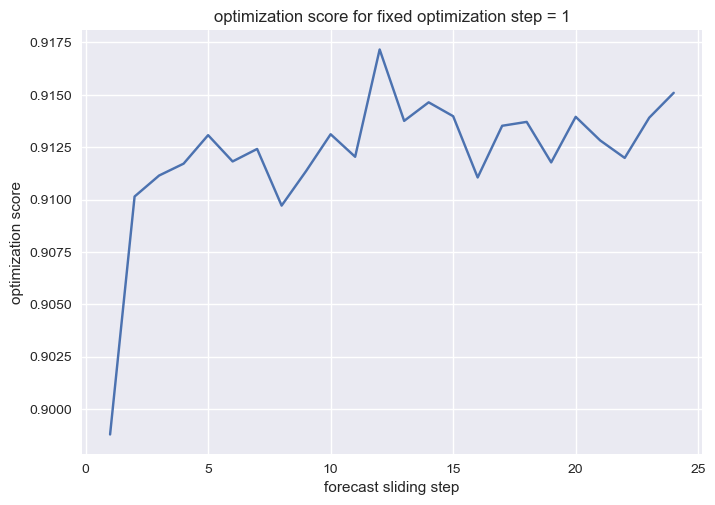

In [20]:
# plot first column
plt.plot(df.iloc[:,0])
# y axis optimization score
plt.ylabel('optimization score')
# x axis forecast sliding step
plt.xlabel('forecast sliding step')
# seaborn style
plt.style.use('seaborn')
# Title fixed optimization deploymnet step = 1
plt.title('optimization score for fixed optimization step = 1')
plt.show()

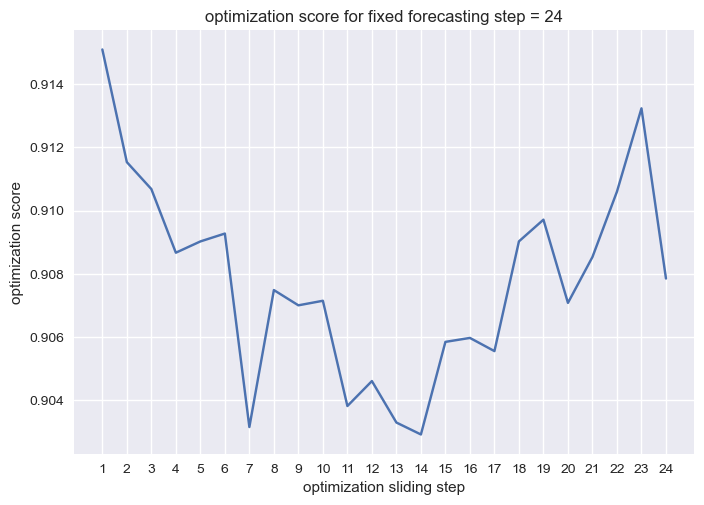

In [21]:
# plot first column
plt.plot(df.iloc[23,:])
# y axis optimization score
plt.ylabel('optimization score')
# x axis forecast sliding step
plt.xlabel('optimization sliding step')
# seaborn style
plt.style.use('seaborn')
# Title fixed forecsating deployment step = 24
plt.title('optimization score for fixed forecasting step = 24')
plt.show()